In [11]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
import tensorflow as tf

#Tools for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

2022-11-24 00:34:15.485315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 00:34:15.607104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 00:34:15.607122: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 00:34:16.223221: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [12]:
#read data
red = pd.read_csv('winequality-red.csv', delimiter = ';')

#Setting X as input and y as output
X = red.iloc[:,:-1]
y = red.iloc[:,-1]

#Testing
print(X.shape)
print(y.shape)


(1599, 11)
(1599,)


In [13]:
#one hot encoding

print("==========SHOWING yHOT:==========")
yHot = tf.one_hot(y, 9) #maybe use 9
print(yHot.numpy())
print(yHot.shape)

==========SHOWING yHOT:==========
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(1599, 9)


2022-11-24 00:34:16.806049: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 00:34:16.806089: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 00:34:16.806124: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neilb-ZenBook-UX562FA-UX562FA): /proc/driver/nvidia/version does not exist
2022-11-24 00:34:16.806651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Text(0.5, 1.0, 'Red Wine Correlation')

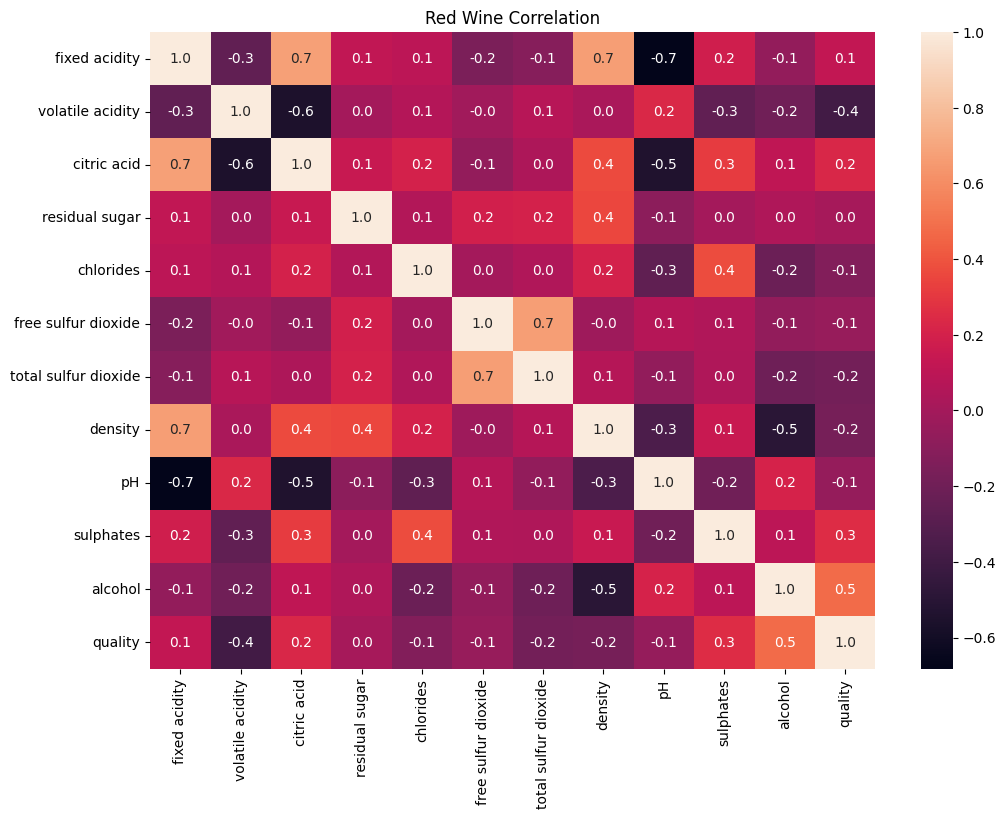

In [14]:
#Displaying data from red db
#Using seaborn to display the data
dims = (11.7,8.27)
fig,ax = plt.subplots(figsize=dims)
CorMap = sns.heatmap(red.corr(), annot = True,fmt= '.1f', ax=ax)
plt.title('Red Wine Correlation')

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


Text(0.5, 1.0, 'Red Wine Quality')

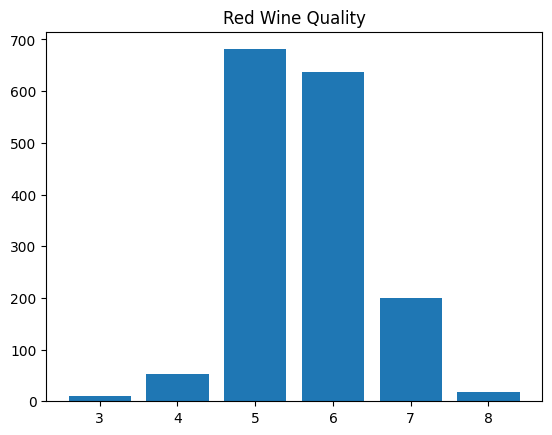

In [15]:
#Red Wine Display Quality Bar Chart
no_class = pd.value_counts(red['quality']).sort_index()
print(no_class)
plt.bar(no_class.index, no_class, align = 'center')
plt.xticks(no_class.index)
plt.title('Red Wine Quality')

Text(0.5, 1.0, 'Red Wine Alcohol vs Quality')

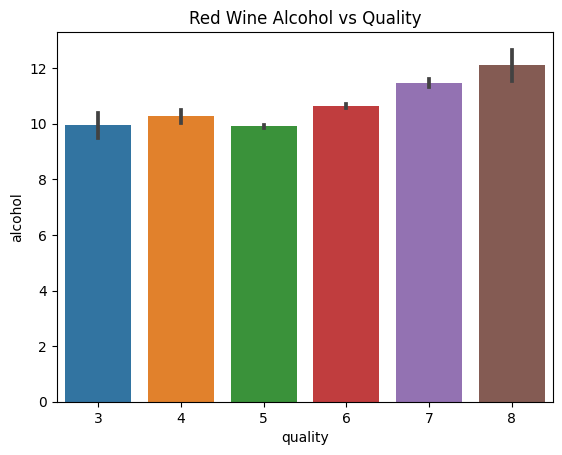

In [16]:
sns.barplot(x = 'quality', y='alcohol', data = red)
plt.title('Red Wine Alcohol vs Quality')

In [17]:
#Random 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print("X_train_full shape :",X_train.shape)
print("X_test shape :", X_test.shape)

X_train_full shape : (1279, 11)
X_test shape : (320, 11)


In [27]:
# Initialize the model
model = tf.keras.models.Sequential()

# Configuring layers
# Input layer using the rectified linear unit activation function
model.add(tf.keras.layers.Dense(11, activation='relu', input_shape=(11,)))

# Additional hidden layers
model.add(tf.keras.layers.Dense(11, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='relu'))

# Output layer using the sigmoid (s-function) activation function
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

# Compile and fit the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
26/26 [==============================] - 1s 1ms/step - loss: 9.7466 - accuracy: 0.0000e+00
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 5.4879 - accuracy: 0.0078
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 3.5382 - accuracy: 0.0508
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 2.2833 - accuracy: 0.2338
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 1.7688 - accuracy: 0.4019
Epoch 6/10
26/26 [==============================] - 0s 1ms/step - loss: 1.5124 - accuracy: 0.4613
Epoch 7/10
26/26 [==============================] - 0s 1ms/step - loss: 1.3727 - accuracy: 0.4715
Epoch 8/10
26/26 [==============================] - 0s 2ms/step - loss: 1.2869 - accuracy: 0.4832
Epoch 9/10
26/26 [==============================] - 0s 1ms/step - loss: 1.2304 - accuracy: 0.4808
Epoch 10/10
26/26 [==============================] - 0s 2ms/step - loss: 1.2015 - accuracy: 0.4801


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 10)                120       
                                                                 
Total params: 516
Trainable params: 516
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Checking if model learned patterns and attributes 
val_loss, val_acc = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 1.1423 - accuracy: 0.4594


In [21]:
#saving model
model.save('redWine_quality.model')


INFO:tensorflow:Assets written to: redWine_quality.model/assets


INFO:tensorflow:Assets written to: redWine_quality.model/assets


In [22]:
#importing model
model = tf.keras.models.load_model('redWine_quality.model')

In [23]:
predictions = model.predict([X_test])
print(np.argmax(predictions[0]))

10/10 [==============================] - 0s 975us/step
5


In [24]:
from ann_visualizer.visualize import ann_viz

In [26]:
ann_viz(model, title="test")